<a href="https://colab.research.google.com/github/pro8mari/code-practice/blob/main/LangGraph_multiple_inputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.9/469.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.3 which is incompatible.


In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [ ]:
class AgentState(TypedDict):
  values: List[int]
  name:str
  result: str

In [ ]:
def process_values(state: AgentState)-> AgentState:
  """This function handles multiple different inputs"""
  state["result"] = f"Hi there {state["name"]}! Your sum = {sum(state["values"])}"
  return state

In [ ]:
graph = StateGraph(AgentState)
graph.add_node("processor",process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

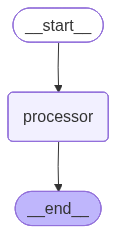

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
total_result = app.invoke({"values":[1, 2, 3, 4],"name":"A"})

In [ ]:
print(total_result['result'])

Hi there A! Your sum = 10


Create a graph where you pass in a single list of integers along with a name and an operation. If the operation is "+", you add the elements and if it is a "*", you multiple the elements, all within the same node.

In [4]:
class ConditionState(TypedDict):
  values: List[int]
  name:str
  operation:str
  result: str

In [6]:
def process_inputs(state: ConditionState)-> ConditionState:
  """This function performs addition or multiplication based on the operation"""
  name = state["name"]
  values = state["values"]
  operation = state["operation"]

  if operation == '+':
    answer = sum(values)
  elif operation == '*':
    answer = 1
    for x in values:
      answer *= x
  else:
    answer = None
  state["result"] = f"Hi {name} your answer is {answer}"
  return state

In [7]:
graph = StateGraph(ConditionState)
graph.add_node('if_else_processor',process_inputs)
graph.set_entry_point('if_else_processor')
graph.set_finish_point('if_else_processor')

In [8]:
app = graph.compile()

In [11]:
result = app.invoke({"name": "Jack Sparrow", "values": [1,2,3,4], "operation": "+"})
print(result["result"])

Hi Jack Sparrow your answer is 10


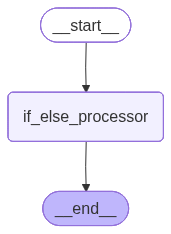

In [9]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))